# Sales Prediction using Python

# Importing required libreries 

In [120]:
# 1) Data loading libraries
import pandas as pd # Is used to deal with the dataset 
import numpy as np  # Is used to perforn mathematical operation on the dataset

In [121]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [122]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [123]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [124]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [126]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [127]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [128]:
df.shape

(200, 4)

In [129]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [130]:
# 2) Importin data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Count'>

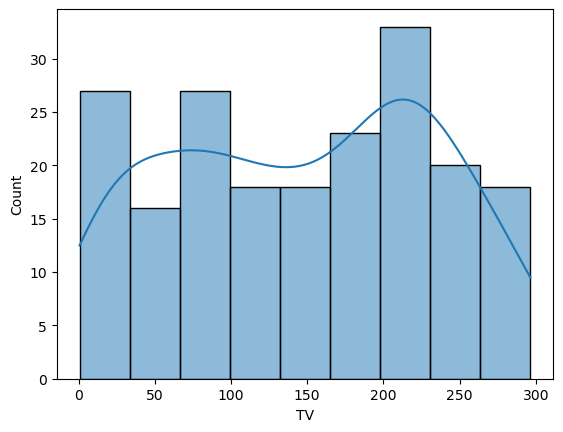

In [131]:
sns.histplot(df["TV"], kde=True)

Axes(0.125,0.11;0.775x0.77)


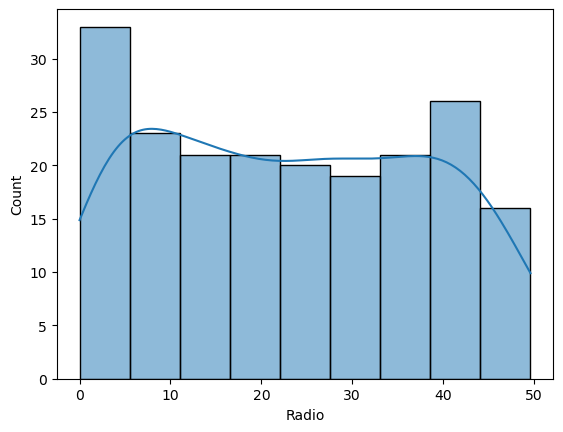

In [132]:
print(sns.histplot(df["Radio"], kde=True))

Axes(0.125,0.11;0.775x0.77)


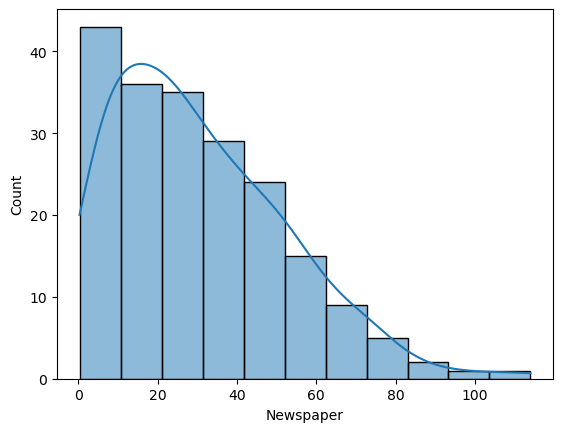

In [133]:
print(sns.histplot(df["Newspaper"], kde=True))

Axes(0.125,0.11;0.775x0.77)


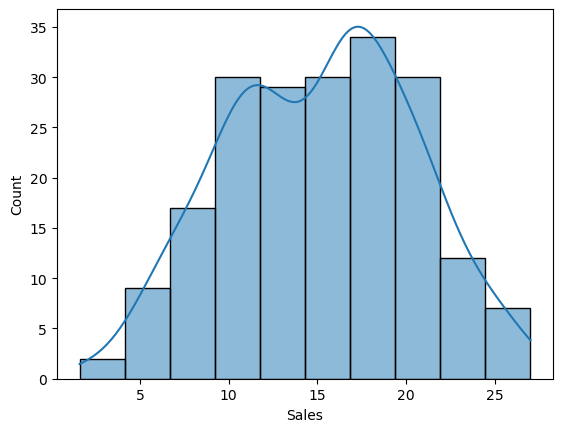

In [134]:
print(sns.histplot(df["Sales"], kde=True))

# Checking Outlier

<Axes: >

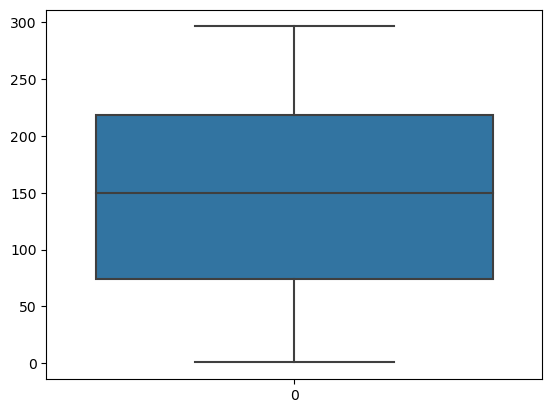

In [135]:
sns.boxplot(df["TV"])

<Axes: >

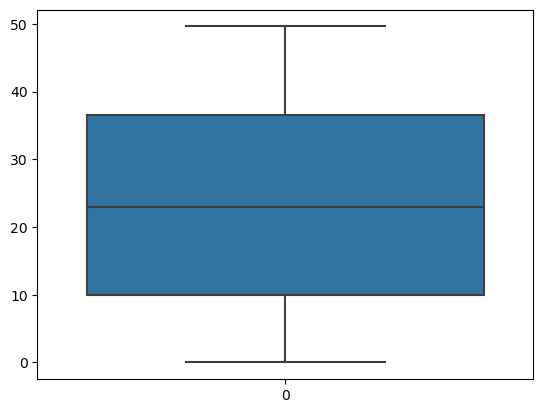

In [136]:
sns.boxplot(df["Radio"])

<Axes: >

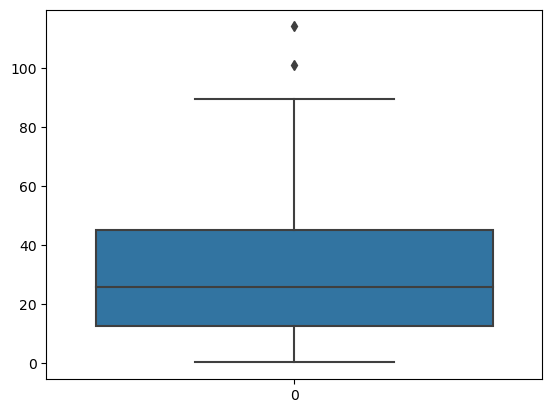

In [137]:
sns.boxplot(df["Newspaper"]) # Outlier detected

In [138]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)
filtered_df = df[~outliers]


In [139]:
filtered_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: >

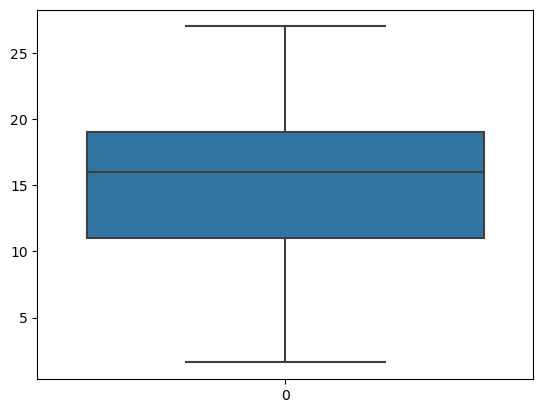

In [140]:
sns.boxplot(df["Sales"])

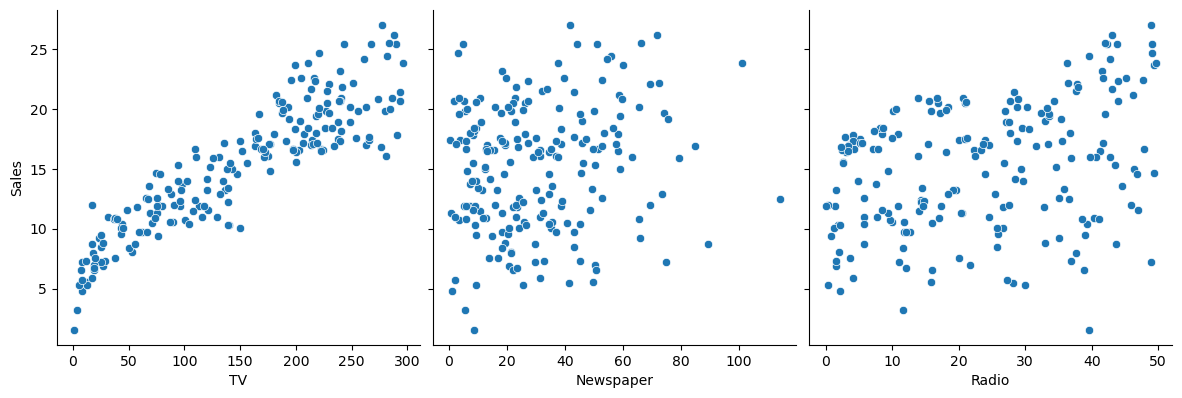

In [141]:
sns.pairplot(df, x_vars=["TV", "Newspaper", "Radio"], y_vars= "Sales", height=4, aspect=1, kind= "scatter" )
plt.show()

# Model Building

In [142]:
X = df["TV"]
y= df["Sales"]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state = 100)

In [145]:
df.shape

(200, 4)

In [146]:
X_train.shape

(140,)

In [147]:
y_test.shape

(60,)

In [148]:
X_test.shape

(60,)

In [149]:
y_train.shape

(140,)

In [150]:
from sklearn import linear_model

In [151]:
model = linear_model.LinearRegression()
model.fit(df.drop("Sales", axis="columns"), df.Sales)

LinearRegression()

In [152]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [153]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [154]:
model.score

<bound method RegressorMixin.score of LinearRegression()>